- Exploratory data analysis (EDA) of MotoGP DataSet

- Are the Italians the Best in MotoGP Championship? 

    In this notebook we are going to try to answer this question and see whether Italy is the best nation when it comes to performance in MotoGP.

    We are going to determine nation performance based on how many championships they have won, both in the constructor championships and in the actual rider championships

    The structure of the notebook:
        
        - 1. Constructors:
            - 1.1 Number of constructor championships won by each country.
            - 1.2 How the number of wins by each country distribute over the various categories?
            - 1.3 How the categories distribute over the wins of each country?
            - 1.4 How does nation performance change over the various decades? Has the change from 2-stroke to 4-stroke engines influenced it?
            - 1.5 Conclusions on constructor data.
        
        - 2. Riders:
            - 2.1 Number of riders per country.
            - 2.2 Number of world championships per country.
            - 2.3 How the championship wins distrubute over the drivers for each country?
            - 2.4  % of pilots that have won championships for the best nations.
            - 2.5 Number of 1st, 2nd, 3rd places per country.
            - 2.6 Conclusions on rider data
        
        3. Conclusion.

In [2]:
# import libraries
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 

plt.style.use('bmh')

In [3]:
# import necessery dataset
constructor = pd.read_csv('MotoGP-Datasets/constructure-world-championship.csv', header=0)

In [4]:
# Exploring the structure of the DataFrame
constructor.head

<bound method NDFrame.head of      Season Constructor    Class
0      2021      Yamaha  MotoGP™
1      2021       Kalex   Moto2™
2      2021         KTM   Moto3™
3      2021    Energica   MotoE™
4      2020      Suzuki  MotoGP™
..      ...         ...      ...
279    1950   Velocette    350cc
280    1949         AJS  MotoGP™
281    1949  Moto Guzzi    250cc
282    1949     Mondial    125cc
283    1949   Velocette    350cc

[284 rows x 3 columns]>

In [5]:
# Counting how many classes were held (MotoGP, 125cc, 250cc etc..) 
constructor['Class'].value_counts()

MotoGP™    73
125cc      63
250cc      61
350cc      34
50cc       22
Moto2™     12
Moto3™     10
80cc        6
MotoE™      3
Name: Class, dtype: int64

In [6]:
# Determining all the unique constructors there are/have been
unique_const = constructor['Constructor'].unique()
print(unique_const, " - Unique constructors: " + str(len(unique_const)))

['Yamaha' 'Kalex' 'KTM' 'Energica' 'Suzuki' 'Honda' 'Suter' 'Aprilia'
 'Moriwaki' 'Derbi' 'Gilera' 'Ducati' 'JJ Cobas' 'Garelli' 'Krauser'
 'Chevallier' 'Zundapp' 'Kawasaki' 'Kreidler' 'Minarelli' 'Motul Bultaco'
 'MBA' 'Bimota-Yamaha' 'Kreidler Van Veen' 'Bultaco' 'Morbidelli'
 'Harley Davidson' 'MV Agusta' 'Van Veen-Kreidler' 'Benelli' 'Mondial'
 'Moto Guzzi' 'NSU' 'Norton' 'Velocette' 'AJS']  - Unique constructors: 36


In [7]:
# count of how many championships each constructor has won?
constructor['Constructor'].value_counts()

Honda                65
Yamaha               38
MV Agusta            35
Aprilia              18
Suzuki               16
Derbi                11
Kalex                10
Kawasaki              9
Moto Guzzi            8
Gilera                8
Garelli               6
Kreidler              6
NSU                   5
KTM                   5
Mondial               5
Harley Davidson       4
Morbidelli            4
Bultaco               3
Norton                3
Benelli               3
Energica              3
Krauser               2
Velocette             2
Minarelli             2
MBA                   2
Van Veen-Kreidler     1
JJ Cobas              1
Ducati                1
Kreidler Van Veen     1
Bimota-Yamaha         1
Motul Bultaco         1
Suter                 1
Moriwaki              1
Zundapp               1
Chevallier            1
AJS                   1
Name: Constructor, dtype: int64

We can see that the two most winning constructors are Japanese, with Honda being the most successful, followed by two Italians.

- 1.1 Number of constructor championships won by each country.

In [8]:
# Grouping the constructors by nationality and adding a new column to the dataframe
italian = ['Energica', 'Aprilia', 'Derbi', 'Gilera', 'Ducati', 
           'Garelli', 'Minarelli', 'MBA', 'Bimota-Yamaha', 'Morbidelli', 
           'MV Agusta', 'Benelli', 'Mondial', 'Moto Guzzi']

japanese = ['Yamaha', 'Suzuki', 'Honda', 'Moriwaki', 'Kawasaki']

german = ['Kalex', 'Krauser', 'Zundapp', 'Kreidler']

In [9]:
nation = []

for i, row in constructor.iterrows():
    if row["Constructor"] in italian:
        nation.append("Italian")
    elif row["Constructor"] in japanese:
        nation.append("Japanese")
    elif row["Constructor"] in german:
        nation.append("German")
    else:
        nation.append("Other")

constructor["Nation"] = nation

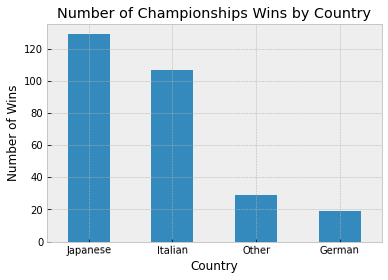

In [10]:
# Count the numbers of wins each nation has
nation_wins = constructor['Nation'].value_counts()
# plot on top of that
nation_wins.plot(kind='bar', rot=1, 
                 xlabel='Country', ylabel="Number of Wins", 
                 title="Number of Championships Wins by Country");

Interesting. Now we can see that Japan have the most wins.

- 1.2 How the number of wins by each country distribute over the various categories?

In [11]:
df_class = constructor.groupby(by=['Class', 'Nation'])['Season'].count()

In [12]:
df_class

Class    Nation  
125cc    Italian     38
         Japanese    22
         Other        3
250cc    Italian     21
         Japanese    33
         Other        7
350cc    Italian     16
         Japanese    13
         Other        5
50cc     German       7
         Italian      2
         Japanese     7
         Other        6
80cc     German       2
         Italian      4
Moto2™   German      10
         Japanese     1
         Other        1
Moto3™   Japanese     5
         Other        5
MotoE™   Italian      3
MotoGP™  Italian     23
         Japanese    48
         Other        2
Name: Season, dtype: int64

In [13]:
# Transforming the counts of seasons won in percentages

In [14]:
n_editors = df_class.unstack().sum(axis=1)

In [15]:
df_class_pct = df_class / n_editors

<AxesSubplot:title={'center':'Number of Wins in each Category by each Nation'}, xlabel='Class', ylabel='Number of Championships'>

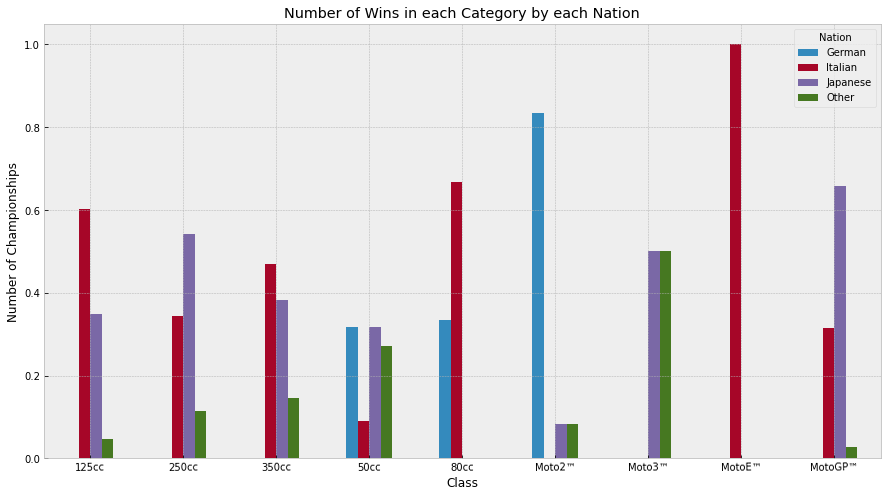

In [16]:
# Charting how many championships each country won in each class
df_class_pct.unstack().plot(kind="bar", legend=True, figsize=(15, 8),
                            rot=1, ylabel="Number of Championships",
                            title="Number of Wins in each Category by each Nation")

From this chart we can see how Italian manufacturers are the most winning ones in the 125cc, 350cc, 80cc and MotoE 

Japanese manufacturers are the most successful in the 250cc and MotoGP categories. In the MotoGP class in particular Japanese manufacturers seem to be particularly dominant (having won just over 65% of all championships).

Another interesting fact is how German constructors are extremely successful in the Moto2 category (83% of total editions won by them), but not really relevant in other classes.

- 1.3 How the categories distribute over the wins of each country?

In [17]:
# Counting how many championships each nation has won in the different categories
nation_wins_categories = constructor.groupby(["Nation", "Class"])["Season"].count()
nation_wins_categories

Nation    Class  
German    50cc        7
          80cc        2
          Moto2™     10
Italian   125cc      38
          250cc      21
          350cc      16
          50cc        2
          80cc        4
          MotoE™      3
          MotoGP™    23
Japanese  125cc      22
          250cc      33
          350cc      13
          50cc        7
          Moto2™      1
          Moto3™      5
          MotoGP™    48
Other     125cc       3
          250cc       7
          350cc       5
          50cc        6
          Moto2™      1
          Moto3™      5
          MotoGP™     2
Name: Season, dtype: int64

In [18]:
# converting the dataframe to percentages
n_wins_by_nation = nation_wins_categories.unstack().sum(axis=1)
n_wins_by_nation

Nation
German       19.0
Italian     107.0
Japanese    129.0
Other        29.0
dtype: float64

In [19]:
nation_wins_categories = nation_wins_categories / n_wins_by_nation
nation_wins_categories

Nation    Class  
German    50cc       0.368421
          80cc       0.105263
          Moto2™     0.526316
Italian   125cc      0.355140
          250cc      0.196262
          350cc      0.149533
          50cc       0.018692
          80cc       0.037383
          MotoE™     0.028037
          MotoGP™    0.214953
Japanese  125cc      0.170543
          250cc      0.255814
          350cc      0.100775
          50cc       0.054264
          Moto2™     0.007752
          Moto3™     0.038760
          MotoGP™    0.372093
Other     125cc      0.103448
          250cc      0.241379
          350cc      0.172414
          50cc       0.206897
          Moto2™     0.034483
          Moto3™     0.172414
          MotoGP™    0.068966
dtype: float64

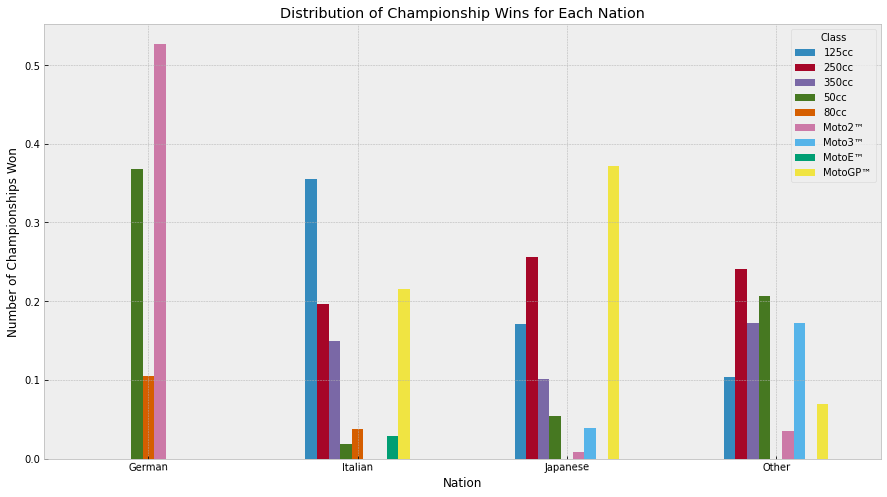

In [20]:
nation_wins_categories.unstack().plot(kind='bar', figsize=(15, 8),
                                      xlabel="Nation", ylabel="Number of Championships Won",
                                      title="Distribution of Championship Wins for Each Nation", rot=1);

Most of wins by Italy come from 125cc, which helps to consolidate the previous intuition that Italian manufacturers were very successful in this category. MotoGP is the second category with the most wins. It's interesting to see that most of wins by Italy come from the 125cc, 250cc, 350cc categories (~ 70%), which suggests that they were more successful during the 2-stroke era than the 4-stroke era. Although Italian constructors have won more in 2-stroke categories than 4-stroke ones, they have won all editions of MotoE. The future of Electric Motosport racing looks very good for Italians.

When it comes to Japan, most of their wins come from the MotoGP category, with 250cc being second. This again confirms the previous intuition that Japanese manufacturers have dominated this category.

Wins by Germany are concentrated in the 50cc and Moto2 category.

In [21]:
# A closer look at how Italy's wins are distributed
italian_wins = nation_wins_categories[3:10]
total_wins = sum(italian_wins)

print("Category", "|", "% of total wins.")
for key, value in italian_wins.iteritems():
    print(key[1],"----->", round(value / total_wins, 2) * 100)

Category | % of total wins.
125cc -----> 36.0
250cc -----> 20.0
350cc -----> 15.0
50cc -----> 2.0
80cc -----> 4.0
MotoE™ -----> 3.0
MotoGP™ -----> 21.0


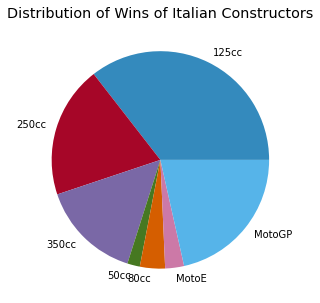

In [22]:
labels = ["125cc", "250cc", "350cc", "50cc", "80cc", "MotoE", "MotoGP"]
italian_wins.plot(kind="pie", figsize=(10, 5), ylabel="",
                  labels=labels,
                  title="Distribution of Wins of Italian Constructors");

- 1.4 How does nation performance change over the various decades? Has the change from 2-stroke to 4-stroke engines influenced it?

In [23]:
decades = ["1949-1959", "1960-1969", "1970-1979", "1980-1989", "1990-1999", "2000-2009", "2010-2019", "2020-Present"]
nations_of_interest = ["Italian", "Japanese", "German", "Other"]

wins_by_decade = pd.DataFrame(columns=["Italian", "Japanese", "German", "Other"], index=decades)

for nation in nations_of_interest:
    sub = constructor[constructor["Nation"] == nation]
    decade_wins = {"1949-1959":0, "1960-1969":0, "1970-1979":0, "1980-1989":0, 
                   "1990-1999":0, "2000-2009":0, "2010-2019":0, "2020-Present":0}
    
    for i, row in sub.iterrows():
        season = row["Season"]
        if season >= 2020:
            decade_wins["2020-Present"] += 1
        elif 2010 <= season <= 2019:
            decade_wins["2010-2019"] += 1
        elif 2000 <= season <= 2009:
            decade_wins["2000-2009"] += 1
        elif 1990 <= season <= 1999:
            decade_wins["1990-1999"] += 1
        elif 1980 <= season <= 1989:
            decade_wins["1980-1989"] += 1
        elif 1970 <= season <= 1979:
            decade_wins["1970-1979"] += 1
        elif 1960 <= season <= 1969:
            decade_wins["1960-1969"] += 1
        elif 1949 <= season <= 1959:
            decade_wins["1949-1959"] += 1
            
    for i, row in wins_by_decade.iterrows():
        wins_by_decade.loc[i, nation] = decade_wins[i]
        

wins_by_decade_pct = wins_by_decade.loc[:, :].div(wins_by_decade.sum(axis=1), axis=0)
wins_by_decade_pct

,Italian,Japanese,German,Other
1949-1959,0.75,0.0,0.0,0.25
1960-1969,0.354167,0.645833,0.0,0.0
1970-1979,0.34,0.4,0.1,0.16
1980-1989,0.325581,0.488372,0.093023,0.093023
1990-1999,0.266667,0.733333,0.0,0.0
2000-2009,0.433333,0.566667,0.0,0.0
2010-2019,0.096774,0.516129,0.258065,0.129032
2020-Present,0.25,0.25,0.25,0.25


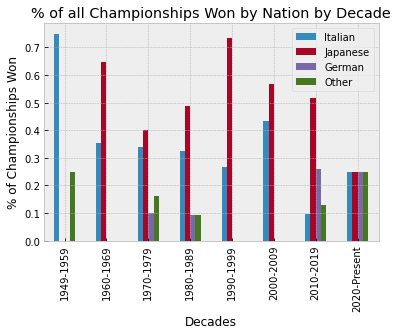

In [24]:
wins_by_decade_pct.plot(kind="bar", xlabel="Decades", ylabel="% of Championships Won",
                        title="% of all Championships Won by Nation by Decade");

Italy dominated in the 50s, but the Japan established itself as the most winning constructor from the 60s onwards. This division by decade does not suggest that the change in engine type affected the winning dynamics.


- 1.5 Conclusions so far:
    When considering total number of wins, Japanese manufacturers have won more than any other. When analyzing closer we can see that japanese manufacurers wins concentrate in the MotoGP, followed by the 125cc and the 250cc. This could suggest that japanese manufacturers are particularly good at producing large-sized 4-stroke engines and small-medium sized 2-stroke engines.

    When looking at italian manufacturers' wins we see that in the 125cc, closely followed by the MotoGP and 250cc categories (with very similar values). The most interesting fact here is that Italian manufacturers have won all editions of the MotoE.

    When looking at these numbers we can say that Japan is the most successful nation when in comes to manufacturing racing motorcycles.

- 2. Drivers

In [25]:
drivers_positions = pd.read_csv("MotoGP-Datasets/riders-finishing-positions.csv", header=0)

drivers_info = pd.read_csv("MotoGP-Datasets/riders-info.csv", header=0)

drivers_info = drivers_info.rename(columns={'Riders All Time in All Classes': 'Riders'})

# handling missing values
drivers_info = drivers_info.fillna(0)
drivers_info.head()

,Riders,Victories,2nd places,3rd places,Pole positions from '74 to 2022,Race fastest lap to 2022,World Championships
0,AGOSTINI Giacomo,122,35.0,2.0,9.0,117.0,15.0
1,ROSSI Valentino,115,67.0,53.0,65.0,96.0,9.0
2,NIETO Angel,90,35.0,14.0,34.0,81.0,13.0
3,MARQUEZ Marc,85,36.0,17.0,90.0,75.0,8.0
4,HAILWOOD Mike,76,25.0,11.0,0.0,79.0,9.0


In [26]:
# getting all the nationalities and the drivers with the corresponding nationality
driver_nationalities = {}

for i, row in drivers_positions.iterrows():
    if row["Country"] not in driver_nationalities.keys():
        driver_nationalities[row["Country"]] = [row["Rider"]]
    else:
        driver_nationalities[row["Country"]].append(row["Rider"])

In [27]:
# Adding nationality information to the driver_info dataframe
def get_nation_from_driver(driver, nation_dict):
    for nation, names in nation_dict.items():
        if driver in names:
            return nation

In [28]:
nation_list = []
rows_to_remove = []

for i, row in drivers_info.iterrows():
    name_list = row["Riders"].title().split(' ')
    new_name = " ".join(name_list[::-1])
    if new_name in set(drivers_positions["Rider"]):
        nation = get_nation_from_driver(new_name, driver_nationalities)
        nation_list.append(nation)
    else:
        print(f"{new_name} not in driver positions!")
        rows_to_remove.append(i)

drivers_info = drivers_info.drop(drivers_info.index[rows_to_remove])
drivers_info['Country'] = nation_list

Jan Vries De not in driver positions!
Henk Kessel Van not in driver positions!
Francois Jean Baldé not in driver positions!
Lorenzo Porta Dalla not in driver positions!
Randy Puniet De not in driver positions!
Mike Meglio Di not in driver positions!
Alex Angelis De not in driver positions!
Didier Radigues De not in driver positions!
Celestino Vietti not in driver positions!
Fabio Giannantonio Di not in driver positions!
Philippe Jean Ruggia not in driver positions!
Idham Khairul Pawi not in driver positions!
Louis Jean Tournadre not in driver positions!
Marcellino Lucchi not in driver positions!
Claude Jean Selini not in driver positions!
Boet Dulmen Van not in driver positions!
Luigi Pier Conforti not in driver positions!
Giuseppe Colnago not in driver positions!
Cees Dongen Van not in driver positions!
Adu Celso-Santos not in driver positions!
Joe Roberts not in driver positions!
Can Öncü not in driver positions!


In [29]:
drivers_info.head()

,Riders,Victories,2nd places,3rd places,Pole positions from '74 to 2022,Race fastest lap to 2022,World Championships,Country
0,AGOSTINI Giacomo,122,35.0,2.0,9.0,117.0,15.0,IT
1,ROSSI Valentino,115,67.0,53.0,65.0,96.0,9.0,IT
2,NIETO Angel,90,35.0,14.0,34.0,81.0,13.0,ES
3,MARQUEZ Marc,85,36.0,17.0,90.0,75.0,8.0,ES
4,HAILWOOD Mike,76,25.0,11.0,0.0,79.0,9.0,GB


- 2.1 Number of Drivers per Country

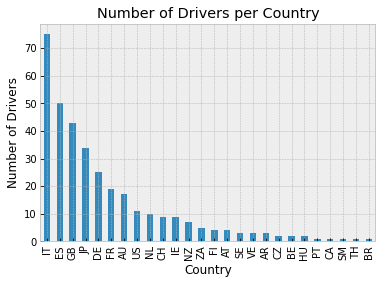

In [30]:
# Getting the number of pilots per country
drivers_per_nation = drivers_info.groupby("Country")["Riders"].count()

# Sorting in descending order
drivers_per_nation = drivers_per_nation.sort_values(ascending=False)

# Plotting
drivers_per_nation.plot(kind="bar", xlabel="Country", ylabel="Number of Drivers",
                        title="Number of Drivers per Country");

Interestingly it seems that the number of pilots per country follows a power law (most of the pilots come from a handful of countries).

- 2.2 Number of world championships per country

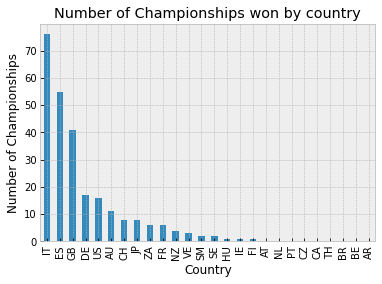

In [31]:
champs_per_country = drivers_info.groupby("Country")["World Championships"].sum()
champs_per_country = champs_per_country.sort_values(ascending=False)
pd.to_numeric(champs_per_country, downcast="signed")

champs_per_country.plot(kind="bar",
                         xlabel = "Country", ylabel = "Number of Championships",
                         title = "Number of Championships won by country");

Interestingly, the number of championships won per nation follows the same pattern as above.

- 2.3  How the championship wins distrubute over the pilots for each country?

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_11888/2556477621.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels([""])
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_11888/2556477621.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels([""])
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_11888/2556477621.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels([""])


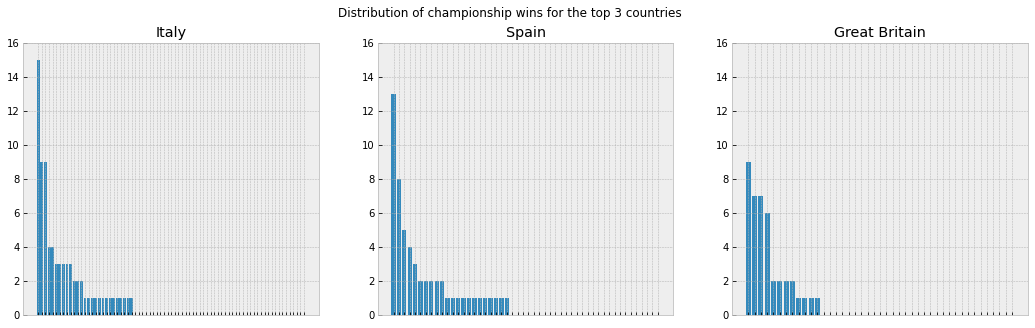

In [32]:
italians = drivers_info[drivers_info["Country"] == "IT"].sort_values(by="World Championships", ascending=False)
spanish = drivers_info[drivers_info["Country"] == "ES"].sort_values(by="World Championships", ascending=False)
british = drivers_info[drivers_info["Country"] == "GB"].sort_values(by="World Championships", ascending=False)


fig, ax = plt.subplots(1, 3, figsize = (18, 5))
fig.suptitle("Distribution of championship wins for the top 3 countries")

ax[0].bar(italians["Riders"], italians["World Championships"])
ax[0].set_title("Italy")
ax[0].set_ylim(bottom = 0, top = 16)
ax[0].set_xticklabels([""])

ax[1].bar(spanish["Riders"], spanish["World Championships"])
ax[1].set_title("Spain")
ax[1].set_ylim(bottom = 0, top = 16)
ax[1].set_xticklabels([""])

ax[2].bar(british["Riders"], british["World Championships"])
ax[2].set_title("Great Britain")
ax[2].set_ylim(bottom = 0, top = 16)
ax[2].set_xticklabels([""])

plt.show();

As we can see, even the championships won within a nation follows a power law. That means that a handful of riders make up for the majority for the championship wins. This also means that to a greater extent, a few riders have won the majority of championships.

- 2.4 % of pilots that have won championships for the best nations

In [33]:
# Creating the dataframe
new_data_frame = pd.DataFrame(columns=["IT", "ES", "GB"], index=["0", "1-5", "6-10", "10+"])

In [34]:
def populate_new_df(pilot_df, new_df):
    nations_of_interest = ["IT", "ES", "GB"]
    
    for nation in nations_of_interest:
        subdf = italians = drivers_info[drivers_info["Country"] == nation]
        
        champ_buckets = {
            "10+": 0,
            "6-10": 0,
            "1-5": 0,
            "0" : 0
        }

        for i, row in subdf.iterrows():
            n = row["World Championships"]
            if n > 10:
                champ_buckets["10+"] += 1
            elif 6 <= n <= 10:
                champ_buckets["6-10"] += 1
            elif 1 <= n <= 5:
                champ_buckets["1-5"] += 1
            elif n == 0.0:
                champ_buckets["0"] += 1

        for i, row in new_df.iterrows():
            row[nation] = champ_buckets[i]

In [35]:
populate_new_df(drivers_info, new_data_frame)
new_data_frame

,IT,ES,GB
0,48,28,31
1-5,24,20,8
6-10,2,1,4
10+,1,1,0


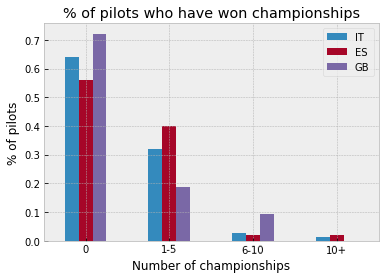

In [36]:
# Plotting the data
pct_data_frame = new_data_frame.loc[:, :].div(new_data_frame.sum(axis=0), axis=1) # transforming to percentages
pct_data_frame.plot(kind="bar", rot=1,
           xlabel = "Number of championships", ylabel = "% of pilots",
           title = "% of pilots who have won championships");

This chart works based on the previous one. With this we can see that most drivers never actually win a championship, while only a small percnetage of them actually goes on to win several ones.

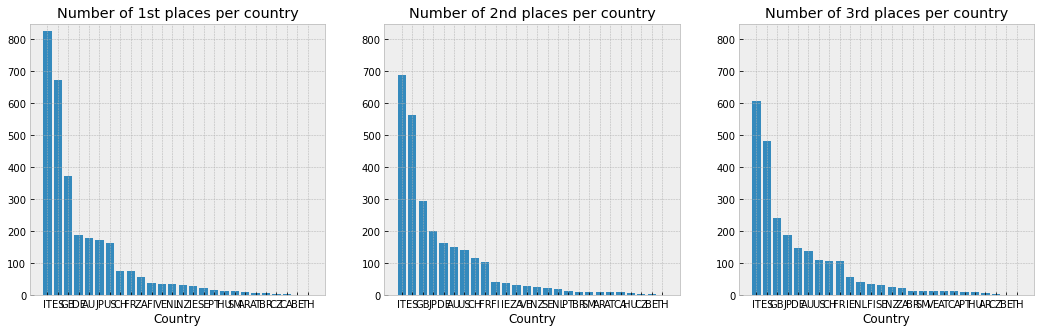

In [37]:
# get the total number of wins, second places and third places for each country
n_first_places = drivers_info.groupby(["Country"])["Victories"].sum().sort_values(ascending=False)
n_second_places = drivers_info.groupby(["Country"])["2nd places"].sum().sort_values(ascending=False)
n_third_places = drivers_info.groupby(["Country"])["3rd places"].sum().sort_values(ascending=False)

fig, ax = plt.subplots(1, 3, figsize = (18, 5))
ax[0].bar(n_first_places.index, n_first_places)
ax[0].set_ylim(bottom=0, top=850)
ax[0].set_title("Number of 1st places per country")
ax[0].set_xlabel("Country")

ax[1].bar(n_second_places.index, n_second_places)
ax[1].set_ylim(bottom=0, top=850)
ax[1].set_title("Number of 2nd places per country")
ax[1].set_xlabel("Country")

ax[2].bar(n_third_places.index, n_third_places)
ax[2].set_ylim(bottom=0, top=850)
ax[2].set_title("Number of 3rd places per country")
ax[2].set_xlabel("Country")

plt.show()

- 2.6 Conclusions on riders data

From the riders data we can see that Italy is the most winning nation when it comes to riders, that means that italian riders are the most winning there are, followed by spanish and british riders.

What is also interesting is the fact the number of championship wins follows a power law, which means that a handful of riders win the most championships, just like a handful of riders have the most wins, 2nd places and 3rd places in races. This pattern also repeats when it comes the wins of pilots within the same nation.

- 3. Conclusion

Based on the data analyzed in this notebook, we saw that Italy is the 2nd best manufacutrer of morotcycles and the country with the best riders.

While Japan is the best when it comes to the constructor championships, it's in 8th place when it comes to championships won by its riders. On the flip side, Spain is the 2nd country when it comes to rider championship wins but does not have any significant constructor championship wins.

Since Italy is the only nation that has very good number when it comes to both constructor and rider championships, it's reasonable to say that overall Italy is the best nation in MotoGP.